In [ ]:
import torch
from torchvision import datasets
import torchvision.transforms as T

transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # normalize to [-1, 1]
])

train_dataset = datasets.CIFAR10(root='data', train=True, transform=transform, download=True)
#test_dataset = datasets.CIFAR10(root='./cifar_data/', train=False, transform=transforms.ToTensor(), )
#train_dataset.data = transforms(torch.from_numpy(train_dataset.data))
#train_dataset.targets = torch.tensor(train_dataset.targets)
#test_dataset.data = torch.tensor(test_dataset.data)
#test_dataset.targets = torch.tensor(test_dataset.targets)

image, label = train_dataset[0]

torch.max(image), torch.min(image)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

image, label = train_dataset[1]
print(image.shape)
print(label)

# (c, h, w) -> (h, w, c)
image = image.permute(1, 2, 0)
image = (image + 1) / 2
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.show()

In [ ]:
from models.model import Unet

bs = 32
ch = 3
size = 32
timestep = 5000
down_chs = (16, 64, 128, 256, 1024)
lr = 2e-4
epochs = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Unet(ch, size, down_chs, timestep).to(device)

device

In [ ]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
def sample_image(image):
    image = image.squeeze(0).cpu()
        
    # (c, h, w) -> (h, w, c)
    image = image.permute(1, 2, 0)
    
    # [-1, 1] -> [0, 1]
    image = (image + 1) / 2
    image = torch.clip(image, 0, 1)

    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.show()

In [ ]:
from torch.utils.data import DataLoader
from torch.optim import Adam
from tqdm import tqdm


train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
optimizer = Adam(model.parameters(), lr=lr)

Epoch 4 | step: 1562 | loss: 0.0849: 100%|██████████| 1563/1563 [00:51<00:00, 30.41it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.93it/s]


torch.Size([3, 32, 32])


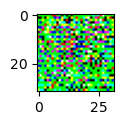

Epoch 5 | step: 1562 | loss: 0.0827: 100%|██████████| 1563/1563 [00:50<00:00, 30.86it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 243.62it/s]


torch.Size([3, 32, 32])


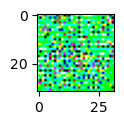

Epoch 6 | step: 1562 | loss: 0.1163: 100%|██████████| 1563/1563 [00:50<00:00, 30.74it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.57it/s]


torch.Size([3, 32, 32])


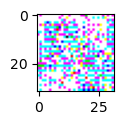

Epoch 7 | step: 1562 | loss: 0.0924: 100%|██████████| 1563/1563 [00:50<00:00, 31.18it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.12it/s]


torch.Size([3, 32, 32])


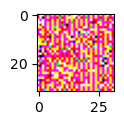

Epoch 8 | step: 1562 | loss: 0.1114: 100%|██████████| 1563/1563 [00:51<00:00, 30.36it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 245.21it/s]

torch.Size([3, 32, 32])


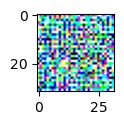

Epoch 9 | step: 1562 | loss: 0.0661: 100%|██████████| 1563/1563 [00:51<00:00, 30.36it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.40it/s]


torch.Size([3, 32, 32])


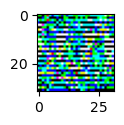

Epoch 10 | step: 1562 | loss: 0.0669: 100%|██████████| 1563/1563 [00:52<00:00, 29.96it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 244.29it/s]


torch.Size([3, 32, 32])


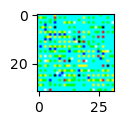

Epoch 11 | step: 1562 | loss: 0.0563: 100%|██████████| 1563/1563 [00:51<00:00, 30.28it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.20it/s]

torch.Size([3, 32, 32])


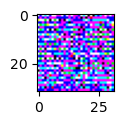

Epoch 12 | step: 1562 | loss: 0.0933: 100%|██████████| 1563/1563 [00:51<00:00, 30.12it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.79it/s]

torch.Size([3, 32, 32])


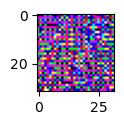

Epoch 13 | step: 1562 | loss: 0.0420: 100%|██████████| 1563/1563 [00:51<00:00, 30.63it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 243.76it/s]


torch.Size([3, 32, 32])


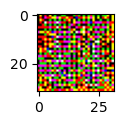

Epoch 14 | step: 1562 | loss: 0.0756: 100%|██████████| 1563/1563 [00:50<00:00, 30.65it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.29it/s]


torch.Size([3, 32, 32])


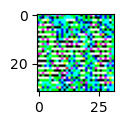

Epoch 15 | step: 1562 | loss: 0.0618: 100%|██████████| 1563/1563 [00:51<00:00, 30.37it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 245.22it/s]


torch.Size([3, 32, 32])


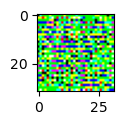

Epoch 16 | step: 1562 | loss: 0.0596: 100%|██████████| 1563/1563 [00:52<00:00, 30.04it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 238.61it/s]


torch.Size([3, 32, 32])


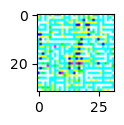

Epoch 17 | step: 1562 | loss: 0.0415: 100%|██████████| 1563/1563 [00:51<00:00, 30.51it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.54it/s]


torch.Size([3, 32, 32])


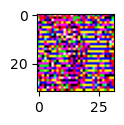

Epoch 18 | step: 1562 | loss: 0.0359: 100%|██████████| 1563/1563 [00:51<00:00, 30.36it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 243.17it/s]


torch.Size([3, 32, 32])


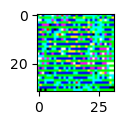

Epoch 19 | step: 1562 | loss: 0.0408: 100%|██████████| 1563/1563 [00:51<00:00, 30.09it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 244.13it/s]


torch.Size([3, 32, 32])


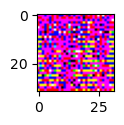

Epoch 20 | step: 1562 | loss: 0.0650: 100%|██████████| 1563/1563 [00:51<00:00, 30.07it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.96it/s]


torch.Size([3, 32, 32])


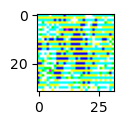

Epoch 21 | step: 1562 | loss: 0.0417: 100%|██████████| 1563/1563 [00:51<00:00, 30.13it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.84it/s]


torch.Size([3, 32, 32])


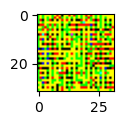

Epoch 22 | step: 1562 | loss: 0.0453: 100%|██████████| 1563/1563 [00:51<00:00, 30.32it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.62it/s]


torch.Size([3, 32, 32])


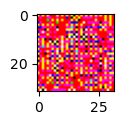

Epoch 23 | step: 1562 | loss: 0.0461: 100%|██████████| 1563/1563 [00:51<00:00, 30.09it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 243.68it/s]

torch.Size([3, 32, 32])


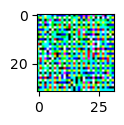

Epoch 24 | step: 1562 | loss: 0.0774: 100%|██████████| 1563/1563 [00:51<00:00, 30.23it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 245.18it/s]


torch.Size([3, 32, 32])


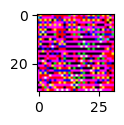

Epoch 25 | step: 1562 | loss: 0.0693: 100%|██████████| 1563/1563 [00:52<00:00, 29.96it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 238.18it/s]

torch.Size([3, 32, 32])


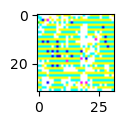

Epoch 26 | step: 1562 | loss: 0.0323: 100%|██████████| 1563/1563 [00:50<00:00, 30.88it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.27it/s]


torch.Size([3, 32, 32])


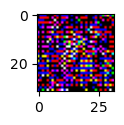

Epoch 27 | step: 1562 | loss: 0.0361: 100%|██████████| 1563/1563 [00:51<00:00, 30.35it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 243.30it/s]


torch.Size([3, 32, 32])


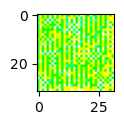

Epoch 28 | step: 1562 | loss: 0.0700: 100%|██████████| 1563/1563 [00:51<00:00, 30.38it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 240.85it/s]


torch.Size([3, 32, 32])


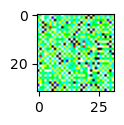

Epoch 29 | step: 1562 | loss: 0.0467: 100%|██████████| 1563/1563 [00:51<00:00, 30.26it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 245.01it/s]

torch.Size([3, 32, 32])


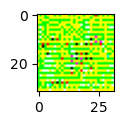

Epoch 30 | step: 1562 | loss: 0.0312: 100%|██████████| 1563/1563 [00:51<00:00, 30.14it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.52it/s]


torch.Size([3, 32, 32])


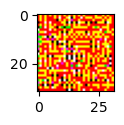

Epoch 31 | step: 1562 | loss: 0.0306: 100%|██████████| 1563/1563 [00:51<00:00, 30.12it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.06it/s]

torch.Size([3, 32, 32])


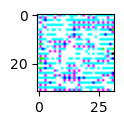

Epoch 32 | step: 1562 | loss: 0.0523: 100%|██████████| 1563/1563 [00:51<00:00, 30.11it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.32it/s]


torch.Size([3, 32, 32])


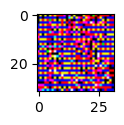

Epoch 33 | step: 1562 | loss: 0.0673: 100%|██████████| 1563/1563 [00:51<00:00, 30.07it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.64it/s]


torch.Size([3, 32, 32])


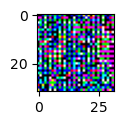

Epoch 34 | step: 1562 | loss: 0.0551: 100%|██████████| 1563/1563 [00:51<00:00, 30.62it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.71it/s]

torch.Size([3, 32, 32])


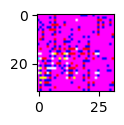

Epoch 35 | step: 1562 | loss: 0.0306: 100%|██████████| 1563/1563 [00:51<00:00, 30.37it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 243.64it/s]


torch.Size([3, 32, 32])


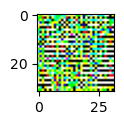

Epoch 36 | step: 1562 | loss: 0.0420: 100%|██████████| 1563/1563 [00:51<00:00, 30.44it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.14it/s]


torch.Size([3, 32, 32])


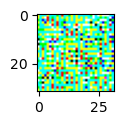

Epoch 37 | step: 1562 | loss: 0.0350: 100%|██████████| 1563/1563 [00:51<00:00, 30.40it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.97it/s]


torch.Size([3, 32, 32])


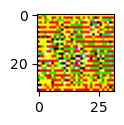

Epoch 38 | step: 1562 | loss: 0.0446: 100%|██████████| 1563/1563 [00:51<00:00, 30.19it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.00it/s]


torch.Size([3, 32, 32])


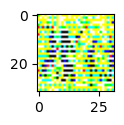

Epoch 39 | step: 1562 | loss: 0.0294: 100%|██████████| 1563/1563 [00:51<00:00, 30.09it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 238.85it/s]


torch.Size([3, 32, 32])


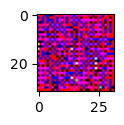

Epoch 40 | step: 1562 | loss: 0.0480: 100%|██████████| 1563/1563 [00:52<00:00, 30.05it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.26it/s]


torch.Size([3, 32, 32])


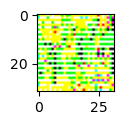

Epoch 41 | step: 1562 | loss: 0.0604: 100%|██████████| 1563/1563 [00:52<00:00, 29.90it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.71it/s]

torch.Size([3, 32, 32])


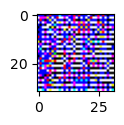

Epoch 42 | step: 1562 | loss: 0.0703: 100%|██████████| 1563/1563 [00:51<00:00, 30.06it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.13it/s]


torch.Size([3, 32, 32])


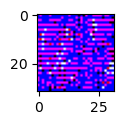

Epoch 43 | step: 1562 | loss: 0.0268: 100%|██████████| 1563/1563 [00:51<00:00, 30.14it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.88it/s]


torch.Size([3, 32, 32])


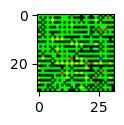

Epoch 44 | step: 1562 | loss: 0.0647: 100%|██████████| 1563/1563 [00:51<00:00, 30.21it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 238.49it/s]


torch.Size([3, 32, 32])


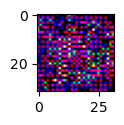

Epoch 45 | step: 1562 | loss: 0.0375: 100%|██████████| 1563/1563 [00:51<00:00, 30.17it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.58it/s]


torch.Size([3, 32, 32])


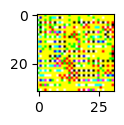

Epoch 46 | step: 1562 | loss: 0.0477: 100%|██████████| 1563/1563 [00:51<00:00, 30.10it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.88it/s]

torch.Size([3, 32, 32])


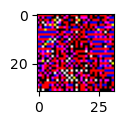

Epoch 47 | step: 1562 | loss: 0.0459: 100%|██████████| 1563/1563 [00:51<00:00, 30.07it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.58it/s]


torch.Size([3, 32, 32])


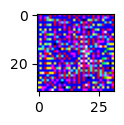

Epoch 48 | step: 1562 | loss: 0.0386: 100%|██████████| 1563/1563 [00:52<00:00, 29.93it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.97it/s]


torch.Size([3, 32, 32])


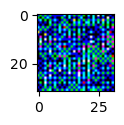

Epoch 49 | step: 1562 | loss: 0.0306: 100%|██████████| 1563/1563 [00:52<00:00, 30.05it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 240.12it/s]


torch.Size([3, 32, 32])


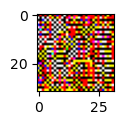

Epoch 50 | step: 1562 | loss: 0.0248: 100%|██████████| 1563/1563 [00:51<00:00, 30.20it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 242.54it/s]


torch.Size([3, 32, 32])


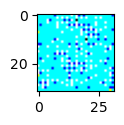

Epoch 51 | step: 1562 | loss: 0.0533: 100%|██████████| 1563/1563 [00:51<00:00, 30.49it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 240.18it/s]


torch.Size([3, 32, 32])


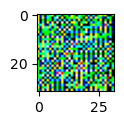

Epoch 52 | step: 1562 | loss: 0.0318: 100%|██████████| 1563/1563 [00:52<00:00, 30.00it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 241.71it/s]


torch.Size([3, 32, 32])


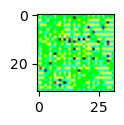

Epoch 53 | step: 1562 | loss: 0.0325: 100%|██████████| 1563/1563 [00:51<00:00, 30.26it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.33it/s]


torch.Size([3, 32, 32])


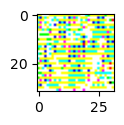

Epoch 54 | step: 1562 | loss: 0.0385: 100%|██████████| 1563/1563 [00:52<00:00, 29.94it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 235.98it/s]


torch.Size([3, 32, 32])


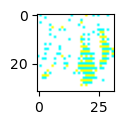

Epoch 55 | step: 1562 | loss: 0.0401: 100%|██████████| 1563/1563 [00:52<00:00, 29.84it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 239.58it/s]


torch.Size([3, 32, 32])


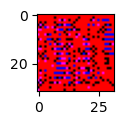

Epoch 56 | step: 1562 | loss: 0.0399: 100%|██████████| 1563/1563 [00:52<00:00, 29.98it/s]
Sampling...: 100%|██████████| 5000/5000 [00:22<00:00, 225.68it/s]


torch.Size([3, 32, 32])


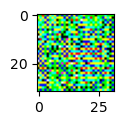

Epoch 57 | step: 1562 | loss: 0.0454: 100%|██████████| 1563/1563 [00:52<00:00, 29.82it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.71it/s]


torch.Size([3, 32, 32])


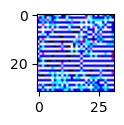

Epoch 58 | step: 1562 | loss: 0.0596: 100%|██████████| 1563/1563 [00:52<00:00, 29.58it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 230.70it/s]


torch.Size([3, 32, 32])


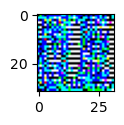

Epoch 59 | step: 1562 | loss: 0.0520: 100%|██████████| 1563/1563 [00:51<00:00, 30.30it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 238.09it/s]


torch.Size([3, 32, 32])


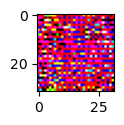

Epoch 60 | step: 1562 | loss: 0.0772: 100%|██████████| 1563/1563 [00:50<00:00, 31.17it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.70it/s]


torch.Size([3, 32, 32])


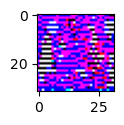

Epoch 61 | step: 1562 | loss: 0.0984: 100%|██████████| 1563/1563 [00:51<00:00, 30.59it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 238.54it/s]


torch.Size([3, 32, 32])


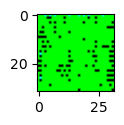

Epoch 62 | step: 1562 | loss: 0.0423: 100%|██████████| 1563/1563 [00:50<00:00, 31.19it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 232.60it/s]


torch.Size([3, 32, 32])


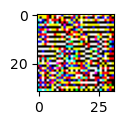

Epoch 63 | step: 1562 | loss: 0.0559: 100%|██████████| 1563/1563 [00:49<00:00, 31.58it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.89it/s]


torch.Size([3, 32, 32])


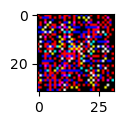

Epoch 64 | step: 1562 | loss: 0.0316: 100%|██████████| 1563/1563 [00:49<00:00, 31.37it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 231.23it/s]


torch.Size([3, 32, 32])


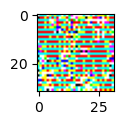

Epoch 65 | step: 1562 | loss: 0.0506: 100%|██████████| 1563/1563 [00:50<00:00, 30.78it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.24it/s]


torch.Size([3, 32, 32])


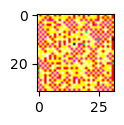

Epoch 66 | step: 1562 | loss: 0.0398: 100%|██████████| 1563/1563 [00:49<00:00, 31.44it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 234.60it/s]


torch.Size([3, 32, 32])


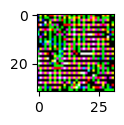

Epoch 67 | step: 1562 | loss: 0.0305: 100%|██████████| 1563/1563 [00:50<00:00, 31.05it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.93it/s]


torch.Size([3, 32, 32])


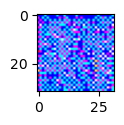

Epoch 68 | step: 1562 | loss: 0.0413: 100%|██████████| 1563/1563 [00:50<00:00, 31.12it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.16it/s]


torch.Size([3, 32, 32])


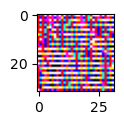

Epoch 69 | step: 1562 | loss: 0.0516: 100%|██████████| 1563/1563 [00:50<00:00, 31.22it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 234.87it/s]


torch.Size([3, 32, 32])


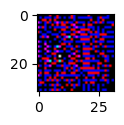

Epoch 70 | step: 1562 | loss: 0.0240: 100%|██████████| 1563/1563 [00:50<00:00, 31.08it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 235.32it/s]

torch.Size([3, 32, 32])


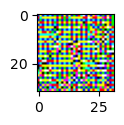

Epoch 71 | step: 1562 | loss: 0.0251: 100%|██████████| 1563/1563 [00:49<00:00, 31.54it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.23it/s]


torch.Size([3, 32, 32])


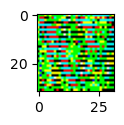

Epoch 72 | step: 1562 | loss: 0.0290: 100%|██████████| 1563/1563 [00:50<00:00, 31.25it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.98it/s]


torch.Size([3, 32, 32])


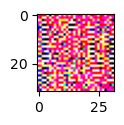

Epoch 73 | step: 1562 | loss: 0.0260: 100%|██████████| 1563/1563 [00:49<00:00, 31.37it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 233.70it/s]


torch.Size([3, 32, 32])


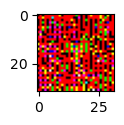

Epoch 74 | step: 1562 | loss: 0.0527: 100%|██████████| 1563/1563 [00:49<00:00, 31.89it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 232.38it/s]

torch.Size([3, 32, 32])


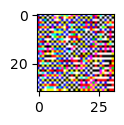

Epoch 75 | step: 1562 | loss: 0.0259: 100%|██████████| 1563/1563 [00:49<00:00, 31.29it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 234.42it/s]

torch.Size([3, 32, 32])


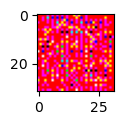

Epoch 76 | step: 1562 | loss: 0.0225: 100%|██████████| 1563/1563 [00:50<00:00, 30.77it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.59it/s]


torch.Size([3, 32, 32])


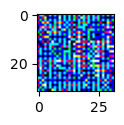

Epoch 77 | step: 1562 | loss: 0.0338: 100%|██████████| 1563/1563 [00:49<00:00, 31.47it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 234.28it/s]


torch.Size([3, 32, 32])


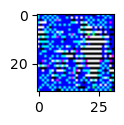

Epoch 78 | step: 1562 | loss: 0.0412: 100%|██████████| 1563/1563 [00:50<00:00, 30.87it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.77it/s]


torch.Size([3, 32, 32])


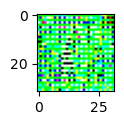

Epoch 79 | step: 1562 | loss: 0.0705: 100%|██████████| 1563/1563 [00:50<00:00, 31.06it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.13it/s]


torch.Size([3, 32, 32])


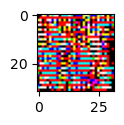

Epoch 80 | step: 1562 | loss: 0.0350: 100%|██████████| 1563/1563 [00:48<00:00, 32.28it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 233.89it/s]


torch.Size([3, 32, 32])


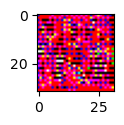

Epoch 81 | step: 1562 | loss: 0.0299: 100%|██████████| 1563/1563 [00:50<00:00, 30.74it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 235.86it/s]


torch.Size([3, 32, 32])


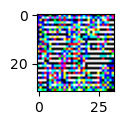

Epoch 82 | step: 1562 | loss: 0.0362: 100%|██████████| 1563/1563 [00:50<00:00, 31.24it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.32it/s]


torch.Size([3, 32, 32])


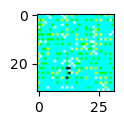

Epoch 83 | step: 1562 | loss: 0.0672: 100%|██████████| 1563/1563 [00:49<00:00, 31.27it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 233.61it/s]

torch.Size([3, 32, 32])


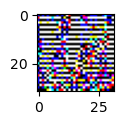

Epoch 84 | step: 1562 | loss: 0.0663: 100%|██████████| 1563/1563 [00:50<00:00, 31.25it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 234.57it/s]

torch.Size([3, 32, 32])


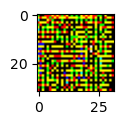

Epoch 85 | step: 1562 | loss: 0.0524: 100%|██████████| 1563/1563 [00:50<00:00, 30.90it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 235.40it/s]


torch.Size([3, 32, 32])


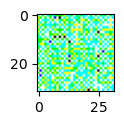

Epoch 86 | step: 1562 | loss: 0.0638: 100%|██████████| 1563/1563 [00:50<00:00, 31.14it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.43it/s]


torch.Size([3, 32, 32])


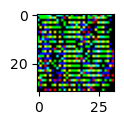

Epoch 87 | step: 1562 | loss: 0.0349: 100%|██████████| 1563/1563 [00:49<00:00, 31.69it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.87it/s]


torch.Size([3, 32, 32])


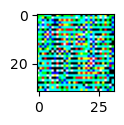

Epoch 88 | step: 1562 | loss: 0.0225: 100%|██████████| 1563/1563 [00:48<00:00, 32.09it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 228.77it/s]


torch.Size([3, 32, 32])


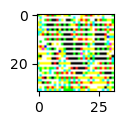

Epoch 89 | step: 1562 | loss: 0.0333: 100%|██████████| 1563/1563 [00:48<00:00, 32.05it/s]
Sampling...: 100%|██████████| 5000/5000 [00:20<00:00, 238.35it/s]


torch.Size([3, 32, 32])


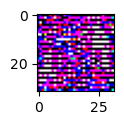

Epoch 90 | step: 1562 | loss: 0.0384: 100%|██████████| 1563/1563 [00:48<00:00, 31.98it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.74it/s]


torch.Size([3, 32, 32])


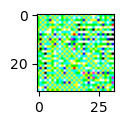

Epoch 91 | step: 1562 | loss: 0.0564: 100%|██████████| 1563/1563 [00:48<00:00, 32.21it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.26it/s]

torch.Size([3, 32, 32])


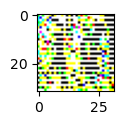

Epoch 92 | step: 1562 | loss: 0.0425: 100%|██████████| 1563/1563 [00:48<00:00, 31.99it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 236.20it/s]

torch.Size([3, 32, 32])


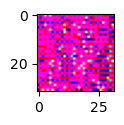

Epoch 93 | step: 1562 | loss: 0.0591: 100%|██████████| 1563/1563 [00:48<00:00, 32.30it/s]
Sampling...: 100%|██████████| 5000/5000 [00:21<00:00, 237.87it/s]

torch.Size([3, 32, 32])


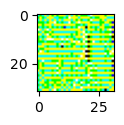

Epoch 94 | step: 492 | loss: 0.0478:  32%|███▏      | 493/1563 [00:15<00:33, 31.79it/s]


KeyboardInterrupt: 

In [7]:
model.train()
samples = []

for epoch in range(epochs):
    loader = tqdm(train_loader)
    
    for step, batch in enumerate(loader):
        image, label = batch
        
        bs_dim = image.shape[0]
        
        image = image.to(device)
        t = torch.randint(0, timestep, (bs_dim, ), device=device)
        
        optimizer.zero_grad()
        
        loss = model.get_loss(image, t)
        
        loss.backward()
        
        optimizer.step()

        loader.set_description(f'Epoch {epoch} | step: {step} | loss: {loss.item():.4f}')
    
    with torch.no_grad():
        sample = model.sampling()
        samples.append(sample)
        sample_image(sample)

In [ ]:
model.eval()

with torch.no_grad():
    image = model.sampling()
    image = image.squeeze(0).cpu()
    # (bs, h, w, c) -> (bs, c, h, w)
    image = image.permute(1, 2, 0)

    print(image.shape)
    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.show()